### Importing required dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

In [62]:
import seaborn as sn
import matplotlib.pyplot as plt

#### Loading Dataset

In [3]:
sonar = pd.read_csv("files/sonar_dataset.csv", header= None)
sonar.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Replaceing M-->1  and  R-->0 

In [4]:
sonar.replace({"R": 0, "M": 1}, inplace= True )

In [5]:
sonar.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


### Looking for missing value

1. Checkong the shape and dtype of every row so we can find missing value accordingly

In [7]:
sonar.shape

(208, 61)

In [10]:
sonar.dtypes.value_counts()

float64    60
int64       1
dtype: int64

-- So there is no categorical value

In [17]:
sonar.describe().iloc[0].value_counts()

208.0    61
Name: count, dtype: int64

so there is 208 cousts in all(61) feature in .describe dataframe and also there is 61 feature at all so there is no missing value in the dataframe at first glannce but might be possible if any has just space value

### Train_test_split

In [20]:
X = sonar.drop(60, axis= "columns")
y = sonar[60]

In [22]:
X.sample(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
21,0.0664,0.0575,0.0842,0.0372,0.0458,0.0771,0.0771,0.1130,0.2353,0.1838,0.2869,0.4129,0.3647,0.1984,0.2840,0.4039,0.5837,0.6792,0.6086,0.4858,0.3246,0.2013,0.2082,0.1686,0.2484,0.2736,0.2984,0.4655,0.6990,0.7474,0.7956,0.7981,0.6715,0.6942,0.7440,0.8169,0.8912,1.0000,0.8753,0.7061,0.6803,0.5898,0.4618,0.3639,0.1492,0.1216,0.1306,0.1198,0.0578,0.0235,0.0135,0.0141,0.0190,0.0043,0.0036,0.0026,0.0024,0.0162,0.0109,0.0079
71,0.0036,0.0078,0.0092,0.0387,0.0530,0.1197,0.1243,0.1026,0.1239,0.0888,0.0937,0.1245,0.1599,0.1542,0.1846,0.1732,0.1477,0.1748,0.1455,0.1579,0.2257,0.1975,0.3368,0.5828,0.8505,1.0000,0.8457,0.6624,0.5564,0.3925,0.3233,0.2054,0.1920,0.2227,0.3147,0.2268,0.0795,0.0748,0.1166,0.1969,0.2619,0.2507,0.1983,0.0948,0.0931,0.0965,0.0381,0.0435,0.0336,0.0055,0.0079,0.0119,0.0055,0.0035,0.0036,0.0004,0.0018,0.0049,0.0024,0.0016
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
198,0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,0.2652,0.3100,0.2381,0.1918,0.1430,0.1735,0.1781,0.2852,0.5036,0.6166,0.7616,0.8125,0.7793,0.8788,0.8813,0.9470,1.0000,0.9739,0.8446,0.6151,0.4302,0.3165,0.2869,0.2017,0.1206,0.0271,0.0580,0.1262,0.1072,0.1082,0.0360,0.1197,0.2061,0.2054,0.1878,0.2047,0.1716,0.1069,0.0477,0.0170,0.0186,0.0096,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060
84,0.0378,0.0318,0.0423,0.0350,0.1787,0.1635,0.0887,0.0817,0.1779,0.2053,0.3135,0.3118,0.3686,0.3885,0.5850,0.7868,0.9739,1.0000,0.9843,0.8610,0.8443,0.9061,0.5847,0.4033,0.5946,0.6793,0.6389,0.5002,0.5578,0.4831,0.4729,0.3318,0.3969,0.3894,0.2314,0.1036,0.1312,0.0864,0.2569,0.3179,0.2649,0.2714,0.1713,0.0584,0.1230,0.2200,0.2198,0.1074,0.0423,0.0162,0.0093,0.0046,0.0044,0.0078,0.0102,0.0065,0.0061,0.0062,0.0043,0.0053
121,0.0162,0.0041,0.0239,0.0441,0.0630,0.0921,0.1368,0.1078,0.1552,0.1779,0.2164,0.2568,0.3089,0.3829,0.4393,0.5335,0.5996,0.6728,0.7309,0.8092,0.8941,0.9668,1.0000,0.9893,0.9376,0.8991,0.9184,0.9128,0.7811,0.6018,0.3765,0.3300,0.2280,0.0212,0.1117,0.1788,0.2373,0.2843,0.2241,0.2715,0.3363,0.2546,0.1867,0.2160,0.1278,0.0768,0.1070,0.0946,0.0636,0.0227,0.0128,0.0173,0.0135,0.0114,0.0062,0.0157,0.0088,0.0036,0.0053,0.0030


In [23]:
y.sample(6)

98     1
171    1
69     0
8      0
0      0
181    1
Name: 60, dtype: int64

In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: int64

--> it is not shuffled, but it need to be shuffled because we feeding class in regular way

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
86,0.0188,0.0370,0.0953,0.0824,0.0249,0.0488,0.1424,0.1972,0.1873,0.1806,0.2139,0.1523,0.1975,0.4844,0.7298,0.7807,0.7906,0.6122,0.4200,0.2807,0.5148,0.7569,0.8596,1.0000,0.8457,0.6797,0.6971,0.5843,0.4772,0.5201,0.4241,0.1592,0.1668,0.0588,0.3967,0.7147,0.7319,0.3509,0.0589,0.2690,0.4200,0.3874,0.2440,0.2000,0.2307,0.1886,0.1960,0.1701,0.1366,0.0398,0.0143,0.0093,0.0033,0.0113,0.0030,0.0057,0.0090,0.0057,0.0068,0.0024
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,0.0906,0.2545,0.1464,0.1272,0.1223,0.1669,0.1424,0.1285,0.1857,0.1136,0.2069,0.0219,0.2400,0.2547,0.0240,0.1923,0.4753,0.7003,0.6825,0.6443,0.7063,0.5373,0.6601,0.8708,0.9518,0.9605,0.7712,0.6772,0.6431,0.6720,0.6035,0.5155,0.3802,0.2278,0.1522,0.0801,0.0804,0.0752,0.0566,0.0175,0.0058,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068
82,0.0409,0.0421,0.0573,0.0130,0.0183,0.1019,0.1054,0.1070,0.2302,0.2259,0.2373,0.3323,0.3827,0.4840,0.6812,0.7555,0.9522,0.9826,0.8871,0.8268,0.7561,0.8217,0.6967,0.6444,0.6948,0.8014,0.6053,0.6084,0.8877,0.8557,0.5563,0.2897,0.3638,0.4786,0.2908,0.0899,0.2043,0.1707,0.0407,0.1286,0.1581,0.2191,0.1701,0.0971,0.2217,0.2732,0.1874,0.1062,0.0665,0.0405,0.0113,0.0028,0.0036,0.0105,0.0120,0.0087,0.0061,0.0061,0.0030,0.0078
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031


In [29]:
y_train.head()

86     0
203    1
67     0
82     0
205    1
Name: 60, dtype: int64

### Creating ANN

In [46]:
model = keras.Sequential([
        keras.layers.Dense(20 ,input_shape = (60, ), activation = "relu"),
        keras.layers.Dense(1, activation= "sigmoid")
    ])
    
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]  
)

1. model with dropout constrain

In [51]:
model.fit(X_train, y_train, epochs= 100)

Train on 166 samples
Epoch 1/100
166/166 [==============================] - 0s 110us/sample - loss: 0.6204 - accuracy: 0.7229
Epoch 2/100
166/166 [==============================] - 0s 162us/sample - loss: 0.6186 - accuracy: 0.7229
Epoch 3/100
166/166 [==============================] - 0s 134us/sample - loss: 0.6133 - accuracy: 0.7229
Epoch 4/100
166/166 [==============================] - 0s 131us/sample - loss: 0.6104 - accuracy: 0.7169
Epoch 5/100
166/166 [==============================] - 0s 117us/sample - loss: 0.6086 - accuracy: 0.7108
Epoch 6/100
166/166 [==============================] - 0s 140us/sample - loss: 0.6033 - accuracy: 0.7349
Epoch 7/100
166/166 [==============================] - 0s 134us/sample - loss: 0.6018 - accuracy: 0.7410
Epoch 8/100
166/166 [==============================] - 0s 130us/sample - loss: 0.5987 - accuracy: 0.7410
Epoch 9/100
166/166 [==============================] - 0s 143us/sample - loss: 0.5947 - accuracy: 0.7530
Epoch 10/100
166/166 [============

166/166 [==============================] - 0s 111us/sample - loss: 0.4201 - accuracy: 0.8253
Epoch 77/100
166/166 [==============================] - 0s 109us/sample - loss: 0.4170 - accuracy: 0.8434
Epoch 78/100
166/166 [==============================] - 0s 133us/sample - loss: 0.4141 - accuracy: 0.8373
Epoch 79/100
166/166 [==============================] - 0s 162us/sample - loss: 0.4119 - accuracy: 0.8434
Epoch 80/100
166/166 [==============================] - 0s 124us/sample - loss: 0.4140 - accuracy: 0.8253
Epoch 81/100
166/166 [==============================] - 0s 133us/sample - loss: 0.4107 - accuracy: 0.8313
Epoch 82/100
166/166 [==============================] - 0s 101us/sample - loss: 0.4067 - accuracy: 0.8434
Epoch 83/100
166/166 [==============================] - 0s 103us/sample - loss: 0.4095 - accuracy: 0.8373
Epoch 84/100
166/166 [==============================] - 0s 105us/sample - loss: 0.4020 - accuracy: 0.8494
Epoch 85/100
166/166 [==============================] - 0s 

In [52]:
model.evaluate(X_test, y_test)

42/42 [==============================] - 0s 691us/sample - loss: 0.3488 - accuracy: 0.8810


[0.3487624412491208, 0.88095236]

#### Predicting test set

In [53]:
y_pred = model.predict(X_test)

In [54]:
y_pred[:5]

array([[0.8182634 ],
       [0.10038793],
       [0.45297652],
       [0.20819765],
       [0.8373208 ]], dtype=float32)

In [55]:
y_test[:5]

161    1
15     0
73     0
96     0
166    1
Name: 60, dtype: int64

In [56]:
## rounding y_pred to 0 and 1
y_pred = np.round(y_pred)

In [57]:
y_pred[:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

### Evaluating Model without dropout regularization

In [59]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  1],
       [ 4, 22]], dtype=int64)

Text(33.0, 0.5, 'truth')

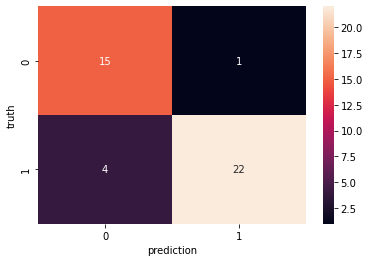

In [63]:
sn.heatmap(cm, annot= True, fmt= "d")
plt.xlabel("prediction")
plt.ylabel("truth")

In [87]:
classification_report_model = classification_report(y_test, y_pred)
print(classification_report_model)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.96      0.85      0.90        26

    accuracy                           0.88        42
   macro avg       0.87      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42



---> detection of 1 is really important for militry purpose but there it is significantly high, but better then random gusess

## Creating Model with Dropout regularization
* for overcome from overfitting and improving performance

In [80]:
model_drop = keras.Sequential([
        keras.layers.Dense(20 ,input_shape = (60, ), activation = "relu"),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(1, activation= "sigmoid")
    ])
    
model_drop.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]  
)

In [81]:
model_drop.fit(X_train, y_train, epochs=100)

Train on 166 samples
Epoch 1/100
166/166 [==============================] - 0s 678us/sample - loss: 0.7152 - accuracy: 0.5181
Epoch 2/100
166/166 [==============================] - 0s 149us/sample - loss: 0.6997 - accuracy: 0.5361
Epoch 3/100
166/166 [==============================] - 0s 133us/sample - loss: 0.7243 - accuracy: 0.4940
Epoch 4/100
166/166 [==============================] - 0s 204us/sample - loss: 0.6818 - accuracy: 0.5482
Epoch 5/100
166/166 [==============================] - 0s 152us/sample - loss: 0.6751 - accuracy: 0.5783
Epoch 6/100
166/166 [==============================] - 0s 143us/sample - loss: 0.7278 - accuracy: 0.4639
Epoch 7/100
166/166 [==============================] - 0s 144us/sample - loss: 0.6711 - accuracy: 0.5904
Epoch 8/100
166/166 [==============================] - 0s 151us/sample - loss: 0.6832 - accuracy: 0.5482
Epoch 9/100
166/166 [==============================] - 0s 149us/sample - loss: 0.6665 - accuracy: 0.5723
Epoch 10/100
166/166 [============

166/166 [==============================] - 0s 129us/sample - loss: 0.5285 - accuracy: 0.7349
Epoch 77/100
166/166 [==============================] - 0s 124us/sample - loss: 0.5129 - accuracy: 0.7410
Epoch 78/100
166/166 [==============================] - 0s 104us/sample - loss: 0.5048 - accuracy: 0.8253
Epoch 79/100
166/166 [==============================] - 0s 121us/sample - loss: 0.5210 - accuracy: 0.8012
Epoch 80/100
166/166 [==============================] - 0s 121us/sample - loss: 0.5118 - accuracy: 0.7711
Epoch 81/100
166/166 [==============================] - 0s 118us/sample - loss: 0.4953 - accuracy: 0.8434
Epoch 82/100
166/166 [==============================] - 0s 134us/sample - loss: 0.4772 - accuracy: 0.7771
Epoch 83/100
166/166 [==============================] - 0s 110us/sample - loss: 0.5032 - accuracy: 0.7892
Epoch 84/100
166/166 [==============================] - 0s 119us/sample - loss: 0.4756 - accuracy: 0.8193
Epoch 85/100
166/166 [==============================] - 0s 

--> so it this case dropout is not prforming enough well
* for epochs 1000
1. 166/166 [==============================] - 0s 119us/sample - loss: 0.1671 - accuracy: 0.9398


* epochs = 100
* 166/166 [==============================] - 0s 132us/sample - loss: 0.4518 - accuracy: 0.8193


#### evaluate model_drop

In [84]:
model_drop.evaluate(X_test, y_test)

42/42 [==============================] - 0s 747us/sample - loss: 0.4235 - accuracy: 0.9048


[0.4234867110138848, 0.9047619]

--> so here dropout is making the model wrost
* for epochs = 1000
1. [0.7983650508381072, 0.33333334]

* for epochs = 100
1. [0.4234867110138848, 0.9047619]



In [88]:
##### predictions on test set using dropout model

In [89]:
y_pred_d = model.predict(X_test)
y_pred_d[:5]

array([[0.44451797],
       [0.45284328],
       [0.36624008],
       [0.4814228 ],
       [0.4494161 ]], dtype=float32)

In [91]:
y_pred_d = np.round(y_pred_d)
y_pred_d[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

y_test[:5]

In [94]:
cm_d = confusion_matrix(y_test, y_pred_d)
cm_d

array([[13,  3],
       [25,  1]], dtype=int64)

In [95]:
classification_report_drop = classification_report(y_test, y_pred_d)
print(classification_report_drop)

              precision    recall  f1-score   support

           0       0.34      0.81      0.48        16
           1       0.25      0.04      0.07        26

    accuracy                           0.33        42
   macro avg       0.30      0.43      0.27        42
weighted avg       0.29      0.33      0.22        42



---> Very poor performance with dropout model, can not approve for launch

###### Diggig the prediction by dropout model

In [99]:
y_pred_d, y_test   # very bed prediction result

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]], dtype=float32),
 161    1
 15     0
 73     0
 96     0
 166    1
 9      0
 100    1
 135    1
 18     0
 148    1
 171    1
 30     0
 155    1
 180    1
 125    1
 197    1
 164    1
 190    1
 84     0
 75     0
 124    1
 170    1
 104    1
 101    1
 69     0
 25     0
 95     0
 16     0
 141    1
 185    1
 154    1
 68     0
 66     0
 120    1
 147    1
 98     1
 138    1
 167    1
 45     0
 113 

In [101]:
<h1 align = "center"> Model For Launch </h1>

SyntaxError: invalid syntax (<ipython-input-101-909074b3e048>, line 1)